<a href="https://colab.research.google.com/github/abhishek404081/airbnb-analysis/blob/main/AIRBNB_PROJECT_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AirBnB Bookings Analysis/Airbnb NYC 2019.csv')

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.shape

(48895, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df.drop('id',axis=1,inplace=True)

In [ ]:
#price can't be zero so we remove those rows
df.loc[df['price']!=0] 

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
df.shape

(48895, 15)

**Data Cleaning - Handling Missing Values**

In [ ]:
# Handling missing Values
df.isnull().sum()

name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

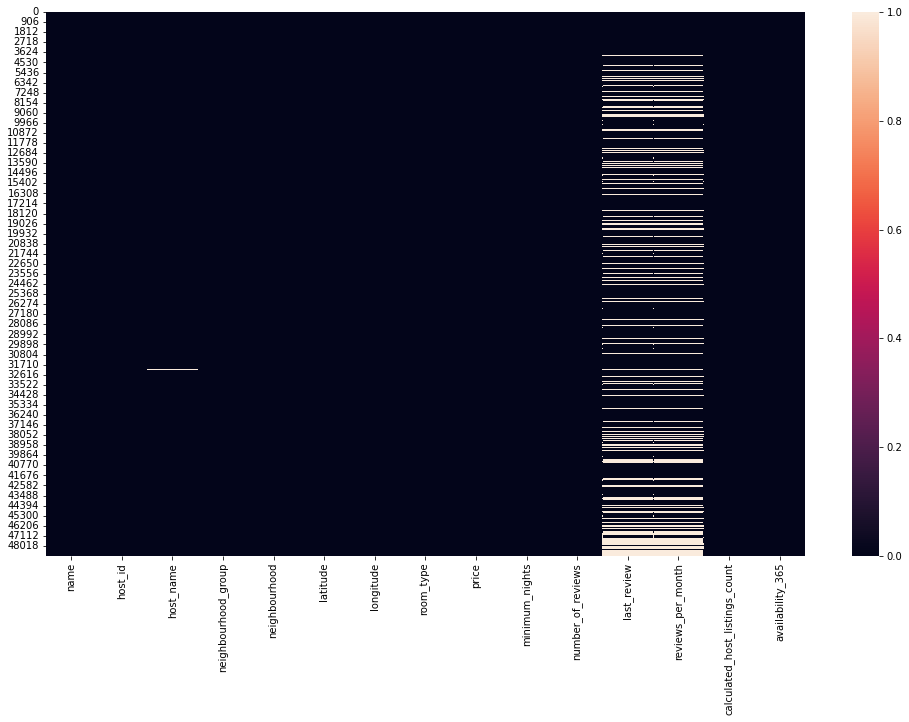

In [ ]:
#showing null values using heatmap
plt.figure(figsize=(17,10))
sns.heatmap(df.isnull())

**Drop the rows and columns containing nan values** 

In [ ]:
# removing null values
airbnb = df.copy()

In [ ]:
df_data_clean=airbnb.loc[~df['host_name'].isnull()]

In [ ]:
df_data_clean['name'].replace({np.nan:'Missing'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df_data_clean['last_review'].replace({np.nan:'Missing'},inplace=True)

In [ ]:
df_data_clean['reviews_per_month'].replace({np.nan:'missing'},inplace=True)

In [ ]:
#Count of Null values after Imputation
df_data_clean.isnull().sum()

name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Finally there is no missing values in the dataframe

**Correlation plot**

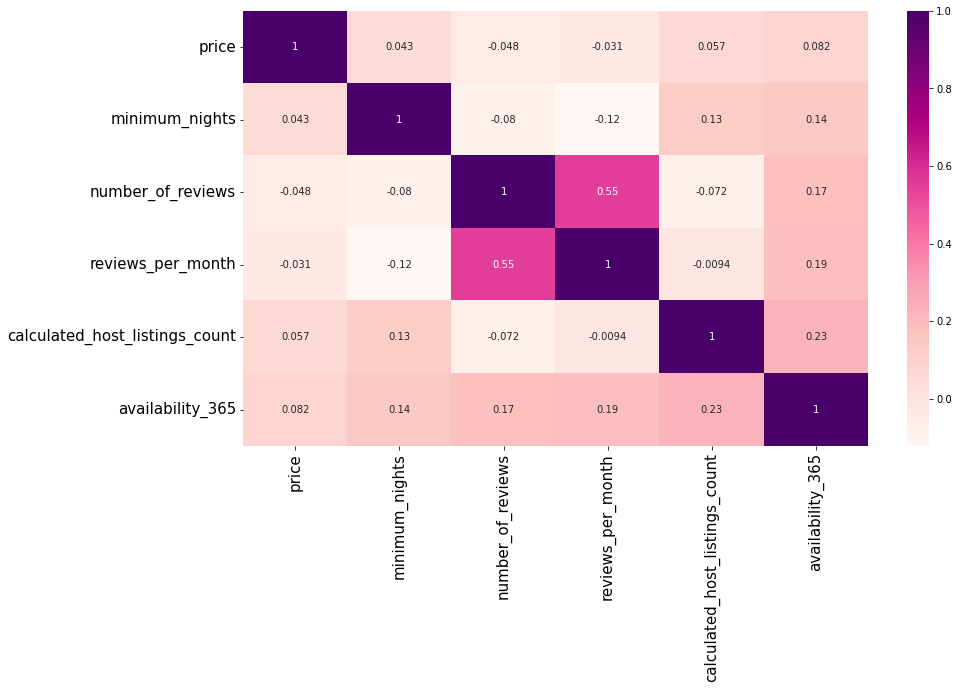

In [ ]:
columns=['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
#setting the figure size and fontsize
plt.figure(figsize=(14,8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#visualzing the corelation between all numeric features
sns.heatmap(airbnb[columns].corr(),annot=True,cmap='RdPu')

**Top 3 correlation columns_**

1. _The **number_of_reviews** and **reviews per_month** columns has highest correlation of values is_ **0.55**
2. _The **calculated_host_listings_count** and **availability_365** columns second highest correlation of values is_ **0.23**
3. _The **reviews_per_month** and **availability_365** columns second highest correlation of values is_ **0.19**

**QUESTION 1 : WHAT ARE THE ROOM TYPES AVAILABLE ?**

In [ ]:
room_types = airbnb['room_type'].value_counts()
room_types
room_count = airbnb['room_type'].value_counts()
room_count

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [ ]:
room_type_dict = {'Room types' : room_types.index, 'Room counts' : room_count}
room_type_df = pd.DataFrame(room_type_dict)
room_type_df

,Room types,Room counts
Entire home/apt,Entire home/apt,25409
Private room,Private room,22326
Shared room,Shared room,1160


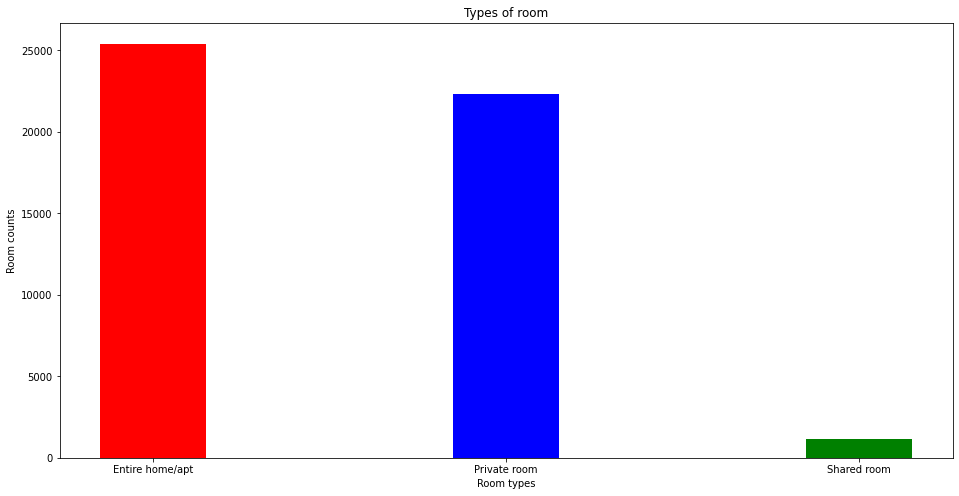

In [ ]:
# visualize bar chart
figure = plt.figure(figsize = [16,8])
plt.bar(room_types.index,room_count,color=['red','blue','green'],width=0.3)
plt.xlabel('Room types')
plt.ylabel('Room counts')
plt.title('Types of room')
plt.show()

**QUESTION 2 : Take a count of each neighborhood to show how popular they are.**

In [ ]:
#counting neighborhood to show popularity
airbnb_1=airbnb['neighbourhood'].value_counts().head(15)

In [ ]:
neighbourhood_dict = {'Neighbourhoods' : airbnb_1.index, 'POPULARITY' : airbnb_1}
neighbourhoods_df = pd.DataFrame(neighbourhood_dict)
neighbourhoods_df

,Neighbourhoods,POPULARITY
Williamsburg,Williamsburg,3920
Bedford-Stuyvesant,Bedford-Stuyvesant,3714
Harlem,Harlem,2658
Bushwick,Bushwick,2465
Upper West Side,Upper West Side,1971
Hell's Kitchen,Hell's Kitchen,1958
East Village,East Village,1853
Upper East Side,Upper East Side,1798
Crown Heights,Crown Heights,1564
Midtown,Midtown,1545


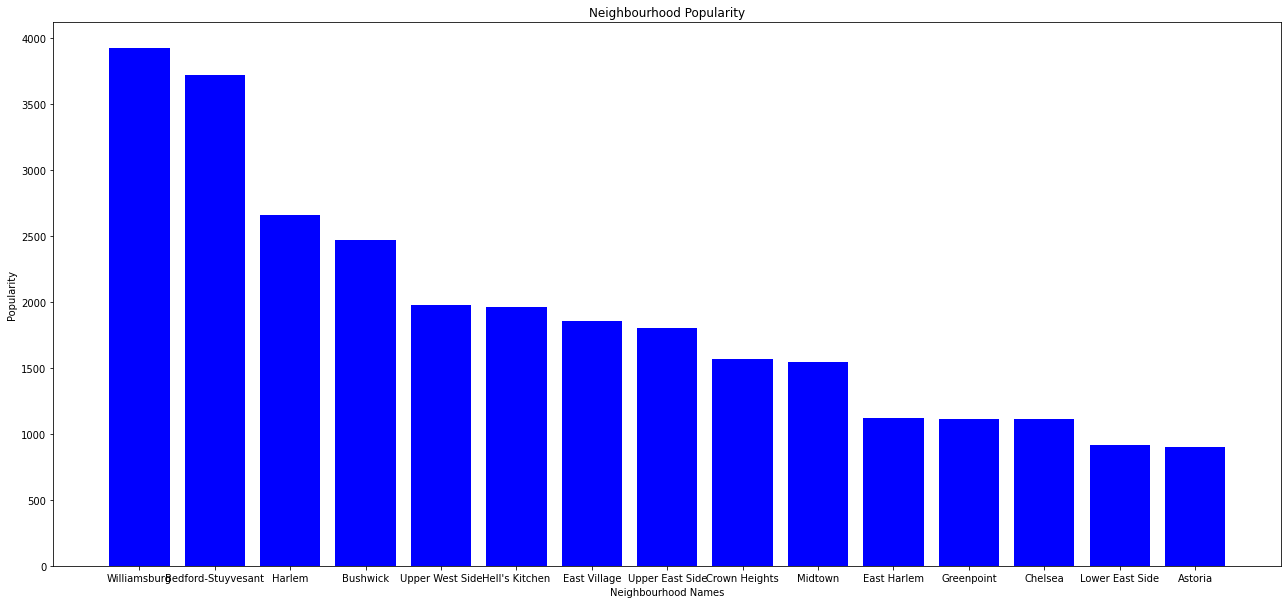

In [ ]:
#visualizing using bar graph
figure = plt.figure(figsize = [22,10])
plt.bar(airbnb_1.index,airbnb_1,color='blue')
plt.xlabel('Neighbourhood Names')
plt.ylabel('Popularity')
plt.title('Neighbourhood Popularity')
plt.show()

*From the above graph it is clear that williamsburg is most popular with 3920 counts*

**QUESTION 3: No. of active host per location (Where most of the host focused to own property)**

In [ ]:
#Apply group by operation on neighbourhood_group for find the number of host according to location
no_of_host_per_location = airbnb.groupby('neighbourhood_group',as_index=False)['host_id'].count().sort_values(['host_id'], ascending=False).rename(columns={'neighbourhood_group':'Location','host_id':'Host'})
no_of_host_per_location

,Location,Host
2,Manhattan,21661
1,Brooklyn,20104
3,Queens,5666
0,Bronx,1091
4,Staten Island,373


***Manhattan is most focused place for host to do their business***

In [ ]:
#Take a simple format of above question without index for plot the line chart
no_of_host_per_location = airbnb.groupby('neighbourhood_group')['host_id'].count()
no_of_host_per_location

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: host_id, dtype: int64

Text(0.5, 0, 'Location')

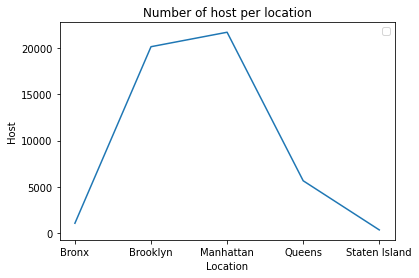

In [ ]:
#Graph
plt.legend(labels = ['No. of Host'])
plt.plot(no_of_host_per_location)
plt.title('Number of host per location')
plt.ylabel('Host')
plt.xlabel('Location')

**QUESTION 4: How many numbers of hostes which has availability of 365 days i.e. 24x7 ?**

In [ ]:
#Copying the original dataframe
df_data_cleannew=airbnb.copy()
#printing the maximum availability
df_data_cleannew["availability_365"].max()

365

In [ ]:
#Fetching data host_id and availability_365 columns
availability_365_days=df_data_cleannew.loc[:,['host_id','availability_365']]
#Filtering out maximum availability of 365 days
host_available_365_days=availability_365_days[availability_365_days['availability_365']>364]
how_many_host_available_for_365_days=host_available_365_days['host_id'].nunique()
print(f"There are totally {how_many_host_available_for_365_days} which has availability of 365 days")

There are totally 894 which has availability of 365 days


 **QUESTION 5 : What can we learn from predictions? (ex: locations, prices, reviews, etc)**

In [ ]:
areas_reviews = df_data_cleannew.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
areas_reviews

,neighbourhood_group,number_of_reviews
0,Bronx,321
1,Brooklyn,488
2,Manhattan,607
3,Queens,629
4,Staten Island,333


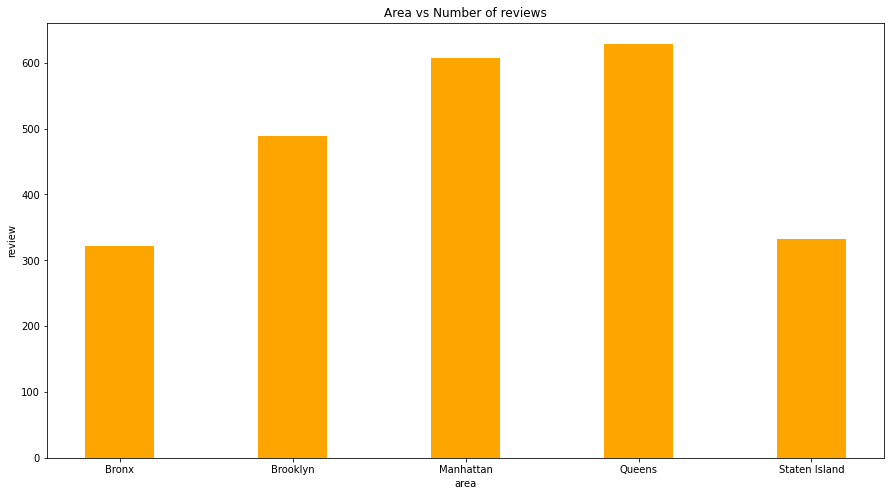

In [ ]:
area = areas_reviews['neighbourhood_group']
review = areas_reviews['number_of_reviews']

fig = plt.figure(figsize = (15, 8))
 
# creating the bar plot
plt.bar(area, review, color ='orange',
        width = 0.4)
 
plt.xlabel("area")
plt.ylabel("review")
plt.title("Area vs Number of reviews")
plt.show()

**QUESTION 6: What is the average preferred price by customers according to the location?**

In [ ]:
avg_preffered_price_df = df_data_cleannew.groupby(['neighbourhood_group','room_type'], as_index=False)['price'].mean().rename(columns={'neighbourhood_group':'Location','price':'Average Price'})
avg_preffered_price_df

,Location,room_type,Average Price
0,Bronx,Entire home/apt,127.506596
1,Bronx,Private room,66.788344
2,Bronx,Shared room,59.800000
3,Brooklyn,Entire home/apt,178.327545
4,Brooklyn,Private room,76.500099
5,Brooklyn,Shared room,50.527845
6,Manhattan,Entire home/apt,249.239109
7,Manhattan,Private room,116.776622
8,Manhattan,Shared room,88.977083
9,Queens,Entire home/apt,147.050573


In [ ]:
#Unstack the group by information for plot the graph
avg_preffered_price_df = df_data_cleannew.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
avg_preffered_price_df

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.500099,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


<Figure size 1080x576 with 0 Axes>

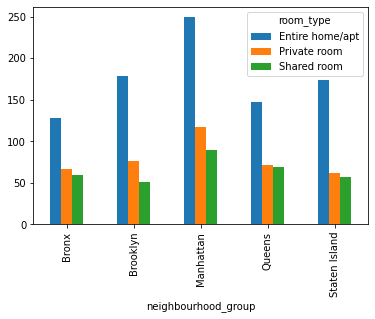

In [ ]:
fig = plt.figure(figsize = (15, 8))
avg_preffered_price_df.plot.bar()

**QUESTION 7 : Which hosts are the busiest and why?**

In [ ]:
busy_hosts = df_data_cleannew.groupby(['host_name'])['number_of_reviews'].max().reset_index()
busy_hosts = busy_hosts.sort_values(by="number_of_reviews",ascending=False).head(10)
busy_hosts

,host_name,number_of_reviews
2652,Dona,629
4931,Jj,607
6981,Maya,543
1673,Carol,540
2290,Danielle,510
936,Asa,488
10830,Wanda,480
6153,Linda,474
2273,Dani,467
661,Angela,466


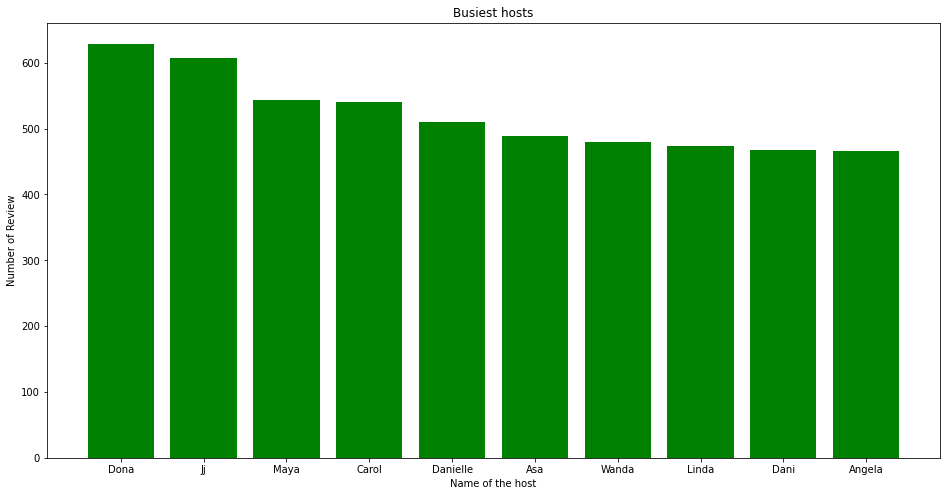

In [ ]:
name = busy_hosts['host_name']
reviews = busy_hosts['number_of_reviews']

fig = plt.figure(figsize = (16, 8))
 
# creating the bar plot
plt.bar(name,reviews,color="green")
 
plt.xlabel("Name of the host")
plt.ylabel("Number of Review")
plt.title("Busiest hosts")
plt.show()

**QUESTION 8 : Who is the top 5 neighbourhood on the bases of reviews ?**

Text(0.5, 1.0, 'Distribution of reviews in the top neighbourhoods')

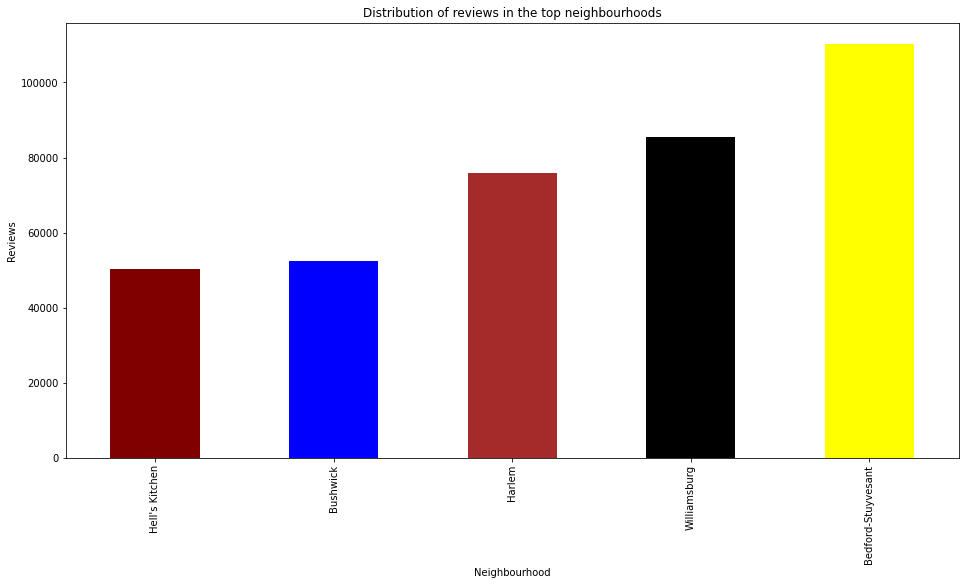

In [ ]:
neighs = df.groupby('neighbourhood')
reviews = neighs['number_of_reviews'].sum().sort_values().tail(5)

reviews.plot(kind = 'bar', color=['maroon', 'blue', 'brown', 'black', 'yellow'], figsize = (16, 8))
plt.xlabel('Neighbourhood')
plt.ylabel('Reviews')
plt.title('Distribution of reviews in the top neighbourhoods')

**QUESTION 9 : Which type of room have maximum bookings ?**

In [ ]:
max_booking = df_data_cleannew.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
max_booking = max_booking.sort_values(by='minimum_nights', ascending=False)
max_booking

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


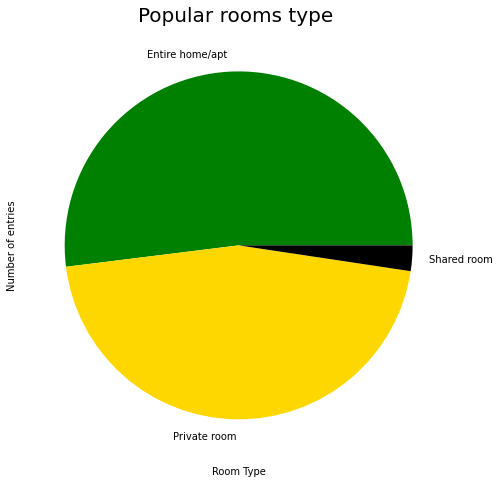

In [ ]:
df_data_cleannew['room_type'].value_counts().plot(kind = 'pie', colors=['green', 'gold', 'black'], figsize = (8, 8))
plt.title('Popular rooms type ', fontsize = 20)
plt.xlabel('Room Type')
plt.ylabel('Number of entries')
plt.show()

*From the above pie chart we get to know that the **entire home/apt** is the **first choice of tourist** and **shared room** is **least prefeered by tourist**.*

**QUESTION 10 : WHICH TYPE OF ROOMS ARE MORE EXPENSIVES ?**

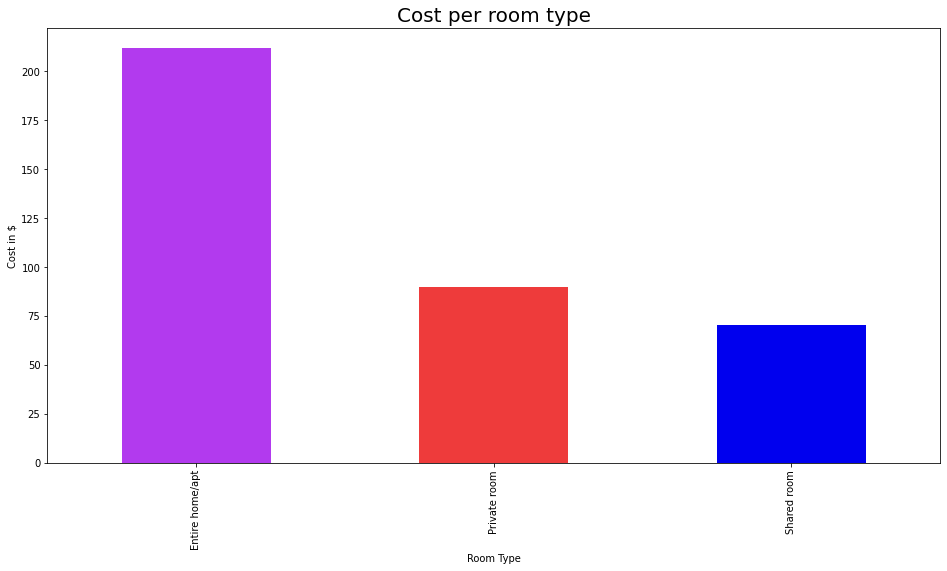

In [ ]:
# Group the data by the room type
room_types = df.groupby('room_type')
# FInd out the mean value of the prices in each room type
prices = room_types['price'].mean().sort_values(ascending = False)
prices.plot(kind = 'bar', color=['#B23AEE', '#EE3B3B', '#0000EE'] ,figsize = (16, 8))
plt.title('Cost per room type', fontsize = 20)
plt.xlabel('Room Type')
plt.ylabel('Cost in $')
plt.show()

In [ ]:
types = prices.keys().tolist()
values = prices.tolist()

print('The most expensive room type is "{}" with {:.1f} mean price'.format(types[0], values[0]))

The most expensive room type is "Entire home/apt" with 211.8 mean price
